In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\siddh\Downloads\Student Sleeping Patterns\student_sleep_patterns.csv")
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


In [3]:
# Dropping unncessary colums that doesn't affect the process
df = df.drop(['Student_ID', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End'], axis=1,inplace = False)


In [4]:
df


,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality
0,24,Other,2nd Year,7.7,7.9,3.4,2,37,10
1,21,Male,1st Year,6.3,6.0,1.9,5,74,2
2,22,Male,4th Year,5.1,6.7,3.9,5,53,5
3,24,Other,4th Year,6.3,8.6,2.8,4,55,9
4,20,Male,4th Year,4.7,2.7,2.7,0,85,3
...,...,...,...,...,...,...,...,...,...
495,24,Male,2nd Year,5.1,9.3,1.9,4,110,4
496,20,Male,2nd Year,8.9,7.7,3.5,3,40,4
497,21,Male,3rd Year,5.7,6.4,3.9,1,68,10
498,18,Female,2nd Year,4.9,0.5,3.5,0,12,2


In [5]:
#Remove suffixes
df['University_Year'] = df['University_Year'].str.replace('st Year', '')
df['University_Year'] = df['University_Year'].str.replace('nd Year', '')
df['University_Year'] = df['University_Year'].str.replace('rd Year', '')
df['University_Year'] = df['University_Year'].str.replace('th Year', '')

df['University_Year'] = df['University_Year'].astype(int)



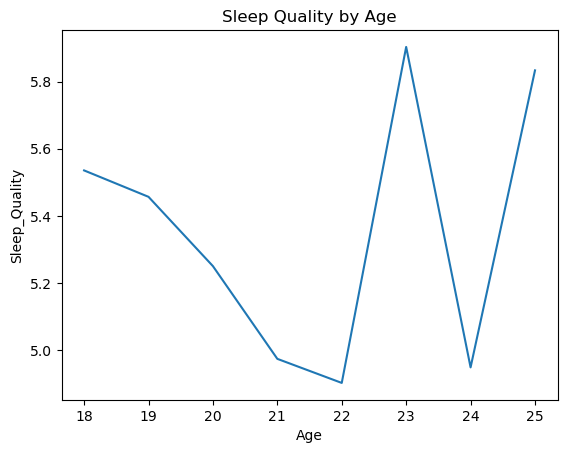

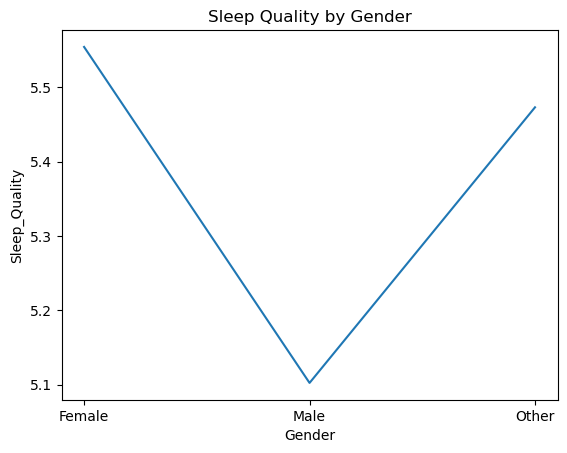

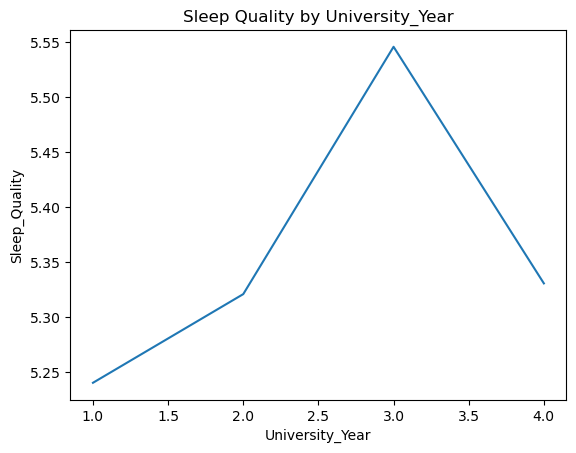

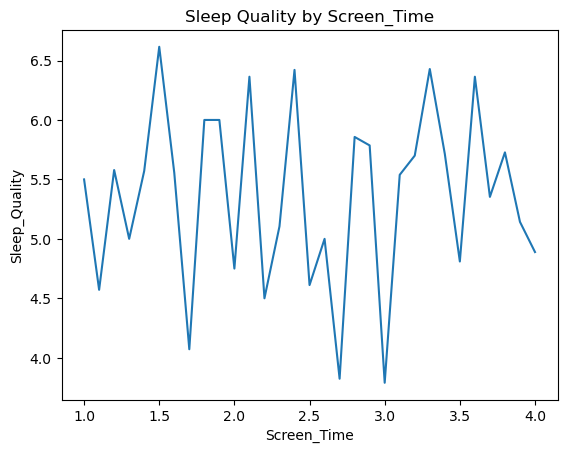

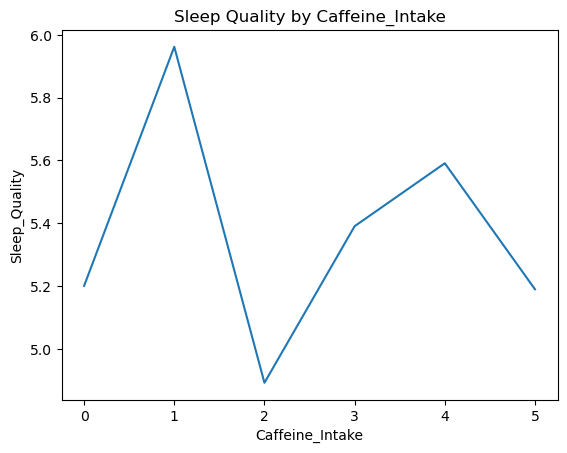

In [6]:
columns = ['Age', 'Gender', 'University_Year', 'Screen_Time', 'Caffeine_Intake',]

for col in columns:
    x = df.groupby([col])['Sleep_Quality'].mean().reset_index()
    sns.lineplot(x=col, y='Sleep_Quality', data=x)
    plt.title(f'Sleep Quality by {col}')
    plt.show()


<Axes: xlabel='Caffeine_Intake', ylabel='count'>

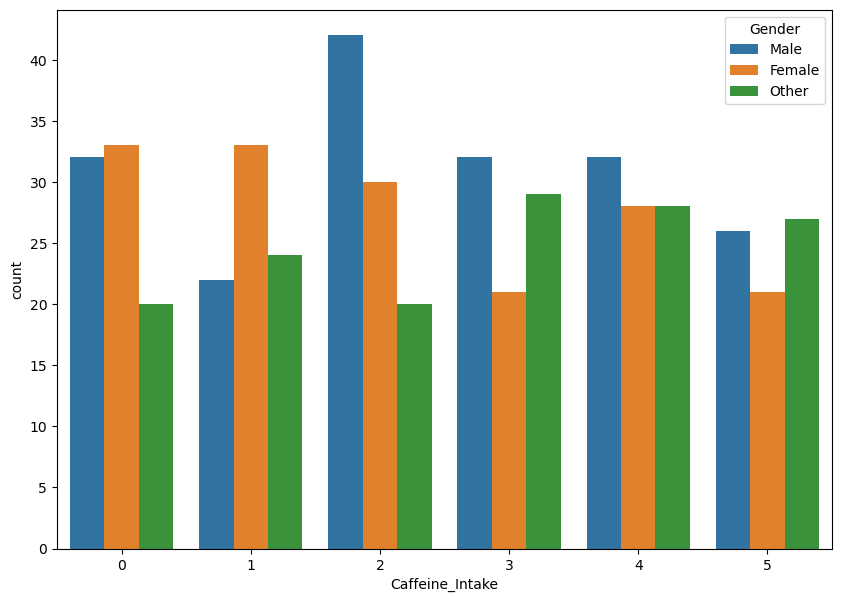

In [7]:
plt.figure(figsize=(10, 7), dpi=100)
sns.countplot(data=df, x='Caffeine_Intake', hue='Gender')

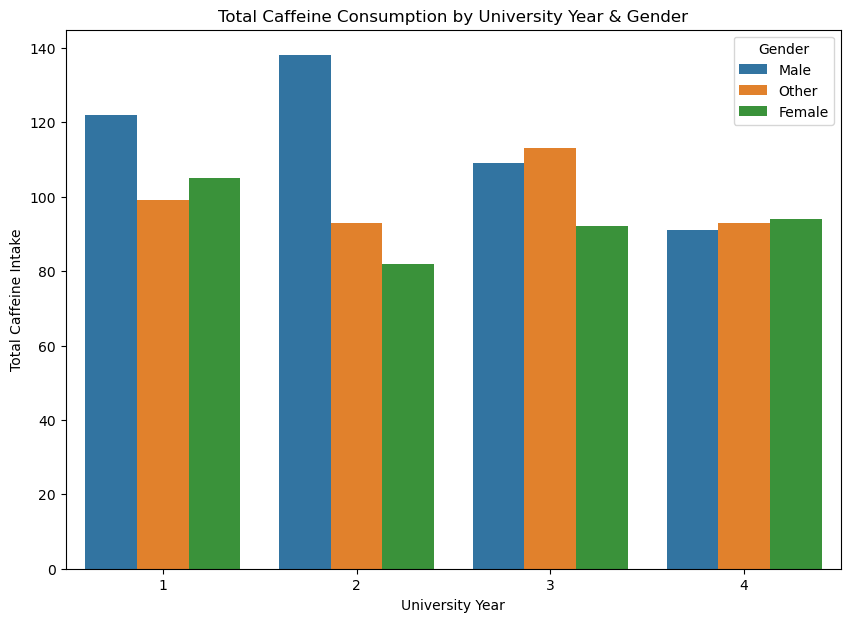

In [8]:
# Total Caffeine Consumption by University Year & Gender 
plt.figure(figsize=(10, 7), dpi=100)
sns.barplot(x='University_Year', y='Caffeine_Intake', hue='Gender', data=df, estimator=sum, ci=None)
plt.title('Total Caffeine Consumption by University Year & Gender')
plt.xlabel('University Year')
plt.ylabel('Total Caffeine Intake')
plt.legend(title='Gender')
plt.show()


In [9]:
X = pd.get_dummies(df)  # Convert categorical variables to numerical format (One-Hot Encoding)
scaler = StandardScaler()  # Initialize the scaler
scaled_X = scaler.fit_transform(X)  # Standardize the features (mean=0, std=1)
normalized_X = normalize(scaled_X)  # Normalize the dataset
normalized_X = pd.DataFrame(normalized_X) 


In [10]:
from sklearn.decomposition import PCA
import pandas as pd

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(normalized_X)  

# Convert to DataFrame
X_pca = pd.DataFrame(X_pca, columns=['P1', 'P2'])

print(X_pca.head())


         P1        P2
0 -0.223946  0.579331
1  0.623364 -0.055017
2  0.511652 -0.149136
3 -0.157796  0.686964
4  0.473896 -0.334482


In [13]:
# Define range of clusters to try (from 2 to 10)
n_clusters_values = range(2, 11)

best_n_clusters = None
best_silhouette_score = -1
best_labels = None

# Loop through the number of clusters to find the best silhouette score
for n_clusters in n_clusters_values:
    # Fit KMeans clustering with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)  # Use PCA-reduced data for clustering

    # Calculate silhouette score to evaluate the clustering
    silhouette_avg = silhouette_score(X_pca, cluster_labels)

    # Update the best parameters if silhouette score improves
    if silhouette_avg > best_silhouette_score:
        best_n_clusters = n_clusters
        best_silhouette_score = silhouette_avg
        best_labels = cluster_labels

# Print the best number of clusters and the corresponding silhouette score
print(f"Best n_clusters: {best_n_clusters}")
print(f"Best Silhouette Score: {best_silhouette_score}")

# Assign the best cluster labels to the original dataframe
df['Cluster'] = best_labels  # Store the best clustering labels in the original DataFrame

# Optionally, you can inspect the PCA-reduced data with cluster labels
X_pca['Cluster'] = best_labels  # Add cluster labels to the PCA-reduced data

Best n_clusters: 3
Best Silhouette Score: 0.8691094735816867


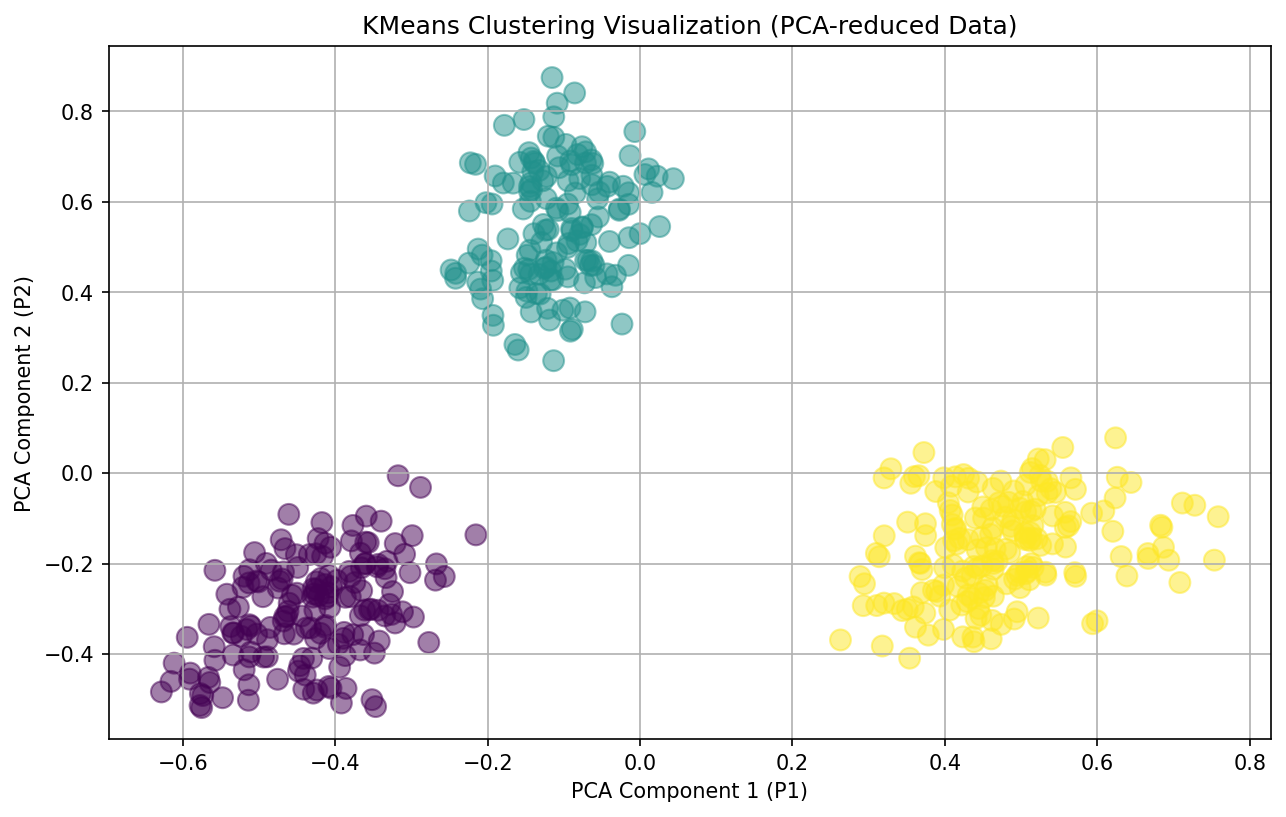

In [14]:
# Plot the KMeans Clusters
plt.figure(figsize=(10, 6), dpi=150)
plt.scatter(X_pca['P1'], X_pca['P2'], c=best_labels, cmap='viridis', s=100, alpha=0.5)
plt.xlabel('PCA Component 1 (P1)')
plt.ylabel('PCA Component 2 (P2)')
plt.title('KMeans Clustering Visualization (PCA-reduced Data)')
plt.grid(True)
plt.show()
